C:\Users\lcox1\AppData\Local\Temp\ipykernel_20228\466345884.py:32: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 4, 0.5)


<function matplotlib.pyplot.show(close=None, block=None)>

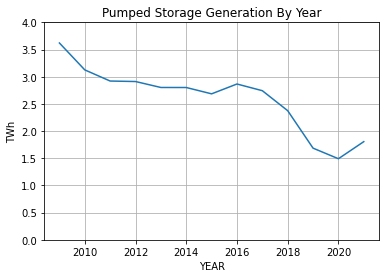

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

# select dataframe and set YEAR as indexed column
df = pd.read_csv('espeni v2.csv', index_col=26)

# remove unecessary columns (ELEXM_SETTLEMENT_DATE/PERIOD, ELEXM_utc/localtime, MONTH, DAY)
df.drop(['ELEXM_SETTLEMENT_DATE', 'ELEXM_SETTLEMENT_PERIOD', 'ELEXM_utc', 'ELEXM_localtime', 'MONTH', 'DAY'], axis=1, inplace=True)

# aggregate data by year
df_yearly = df.groupby('YEAR').sum()

# remove data for 2008 and 2022 as both sets are incomplete
df_yearly.drop(index=[2008, 2022], axis=0, inplace=True)

# convert yearly MW data to TWh for PHES, SOLAR, WIND, COAL, OIL, GAS & NUCLEAR (new columns produced)
df_yearly['ENERGY_ELEXM_PHES_TWh'] = (df_yearly['POWER_ELEXM_PS_MW']*0.5)/1000000
df_yearly['ENERGY_NGEM_SOLAR_TWh'] = (df_yearly['POWER_NGEM_EMBEDDED_SOLAR_GENERATION_MW']*0.5)/1000000
df_yearly['ENERGY_ELEXM_WIND_TWh'] = ((df_yearly['POWER_ELEXM_WIND_MW']+(df_yearly['POWER_NGEM_EMBEDDED_WIND_GENERATION_MW']))*0.5)/1000000
df_yearly['ENERGY_ELEXM_COAL_TWh'] = (df_yearly['POWER_ELEXM_COAL_MW']*0.5)/1000000
df_yearly['ENERGY_ELEXM_OIL_TWh'] = (df_yearly['POWER_ELEXM_OIL_MW']*0.5)/1000000
df_yearly['ENERGY_ELEXM_CCGT_TWh'] = (df_yearly['POWER_ELEXM_CCGT_MW']*0.5)/1000000
df_yearly['ENERGY_ELEXM_NUCLEAR_TWh'] = (df_yearly['POWER_ELEXM_NUCLEAR_MW']*0.5)/1000000
df_yearly.head()

# plot yearly TWh data for PHES generation
plt.plot(df_yearly['ENERGY_ELEXM_PHES_TWh'])
plt.xlabel('YEAR')
plt.ylabel('TWh')
plt.title('Pumped Storage Generation By Year')
plt.ylim(0, 4, 0.5)
plt.grid()
plt.show